In [2]:
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import folium
import seaborn as sb
from IPython.display import HTML
from wordcloud import WordCloud, STOPWORDS


# Enable inline plotting
%matplotlib inline

#### Create a dataframe from data in train.csv

In [3]:
train_path = r'../../data/train.csv'
train = pd.read_csv(train_path)

# Task 1: Data Exploration

### Query 1.1
#### Most popular room type

,room_type,Count
0,Entire home/apt,24765
1,Private room,3223
2,Shared room,134


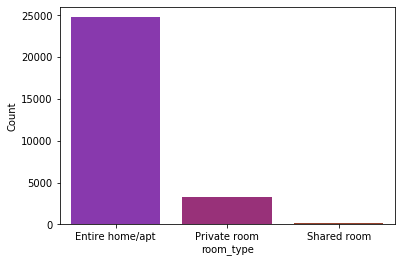

In [4]:
q1 = train.groupby(['room_type']).count().sort_values(by='id', ascending=False)
q1 = q1.rename(columns={q1.columns[0]: 'Count'})
q1 = q1.reset_index()
pal = sb.husl_palette(8, h=.8, l=.4)
sb.barplot(x='room_type', y=q1.columns[1], data = q1, palette = pal)
q1.filter(items = ['room_type', 'Count'])

### Query 1.2
#### Price fluctuation over the course of 3 months

,month,mean price
0,02_February,65.497912
1,03_March,64.894456
2,04_April,64.363730


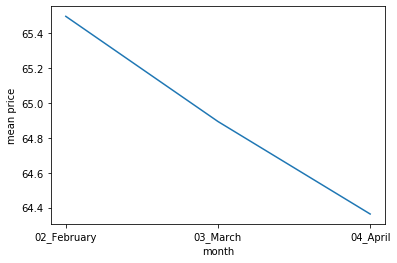

In [5]:
q2 = train.groupby(['month']).mean().filter(items=['price'])
q2 = q2.rename(columns={'price':'mean price'})
q2 = q2.reset_index()
sb.lineplot(x='month', y=q2.columns[1], data = q2)
q2

### Query 1.3
#### Top 5 neighbourhoods with the most reviews

,neighbourhood,number_of_reviews
0,Plaka,132361
1,Koukaki,90357
2,Neos Kosmos,83348
3,Psyri,54353
4,Metaxourgeio,44792


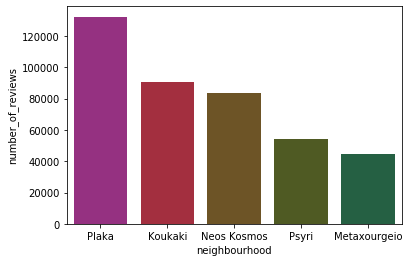

In [6]:
q3 = train.groupby(['neighbourhood']).sum()
q3 = q3.sort_values('number_of_reviews', ascending = False)
q3 = q3.head(5).filter(items=['number_of_reviews'])
q3 = q3.reset_index()
pal = sb.husl_palette(8, h=.9, l=.4)
sb.barplot(x='neighbourhood', y=q3.columns[1], data=q3, palette=pal)
q3

### Query 1.4
#### Neighbourhood with the most listings

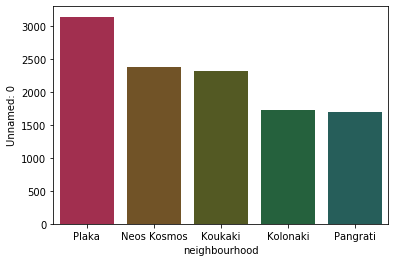

In [7]:
q4 = train.groupby(['neighbourhood']).count()
q4 = q4.sort_values(['id'], ascending = False).head(5)
q4 = q4.reset_index()
pal = sb.husl_palette(8, l=.4)
sb.barplot(x='neighbourhood', y=q4.columns[1], data = q4, palette=pal)

### Query 1.5
#### Listings per neighbourhood and per month

##### Per neighbourhood

,neighbourhood,Count
0,Agios Loukas,209
1,Agios Nikolaos,611
2,Akadimia Platonos,114
3,Ambelokipi,1482
4,Attiki,758
5,Exarcheia,1330
6,Gazi,282
7,Goudi,87
8,Ilisia,502
9,Kerameikos,756


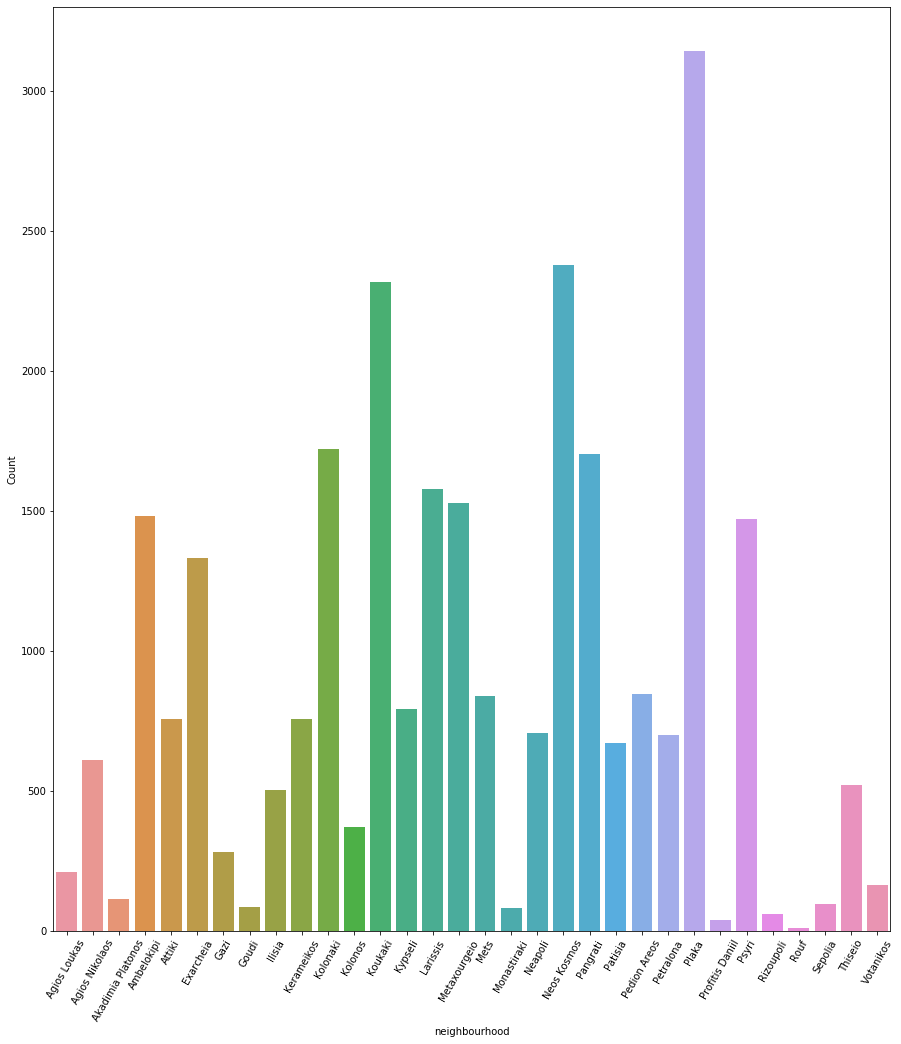

In [8]:
q5_neigh = train.groupby(['neighbourhood']).count()
q5_neigh = q5_neigh.rename(columns={'id': 'Count'})
q5_neigh = q5_neigh.filter(items=['neighbourhood','Count'])
q5_neigh = q5_neigh.reset_index()
fig = plt.subplots(figsize=(15, 17))
chart = sb.barplot(x='neighbourhood', y='Count', data=q5_neigh)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
q5_neigh


##### Per month

,month,count
0,02_February,9100
1,03_March,9361
2,04_April,9661


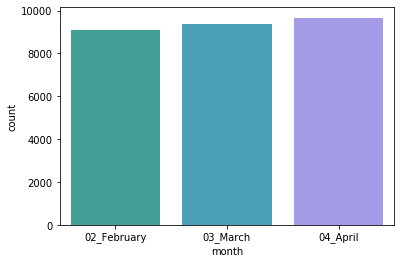

In [9]:
q5_month = train.groupby(['month']).count()
q5_month = q5_month.rename(columns={'id': 'count'})
q5_month = q5_month.filter(items=['count'])
q5_month = q5_month.reset_index()
pal = sb.husl_palette(8, h=.5)
sb.barplot(x='month', y=q5_month.columns[1], data = q5_month, palette = pal)
q5_month

### Query 1.6
#### A histogram of the variable 'neighbourhood

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1efd29c250>]],
      dtype=object)

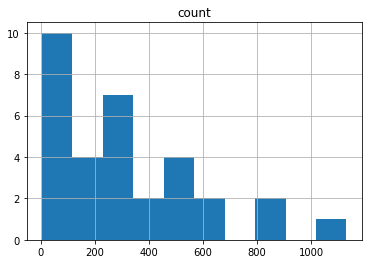

In [10]:
q6 = train.drop_duplicates(subset='id').groupby(['neighbourhood']).count()
q6 = q6.rename(columns = {'id':'count'})
q6.hist(column = 'count')

### Query 1.7
#### Most popular room type in each neighbourhood

,neighbourhood,room_type,Count
0,Agios Loukas,Entire home/apt,177
1,Agios Loukas,Private room,29
2,Agios Loukas,Shared room,3
3,Agios Nikolaos,Entire home/apt,524
4,Agios Nikolaos,Private room,87
...,...,...,...
80,Thiseio,Entire home/apt,478
81,Thiseio,Private room,40
82,Thiseio,Shared room,2
83,Votanikos,Entire home/apt,146


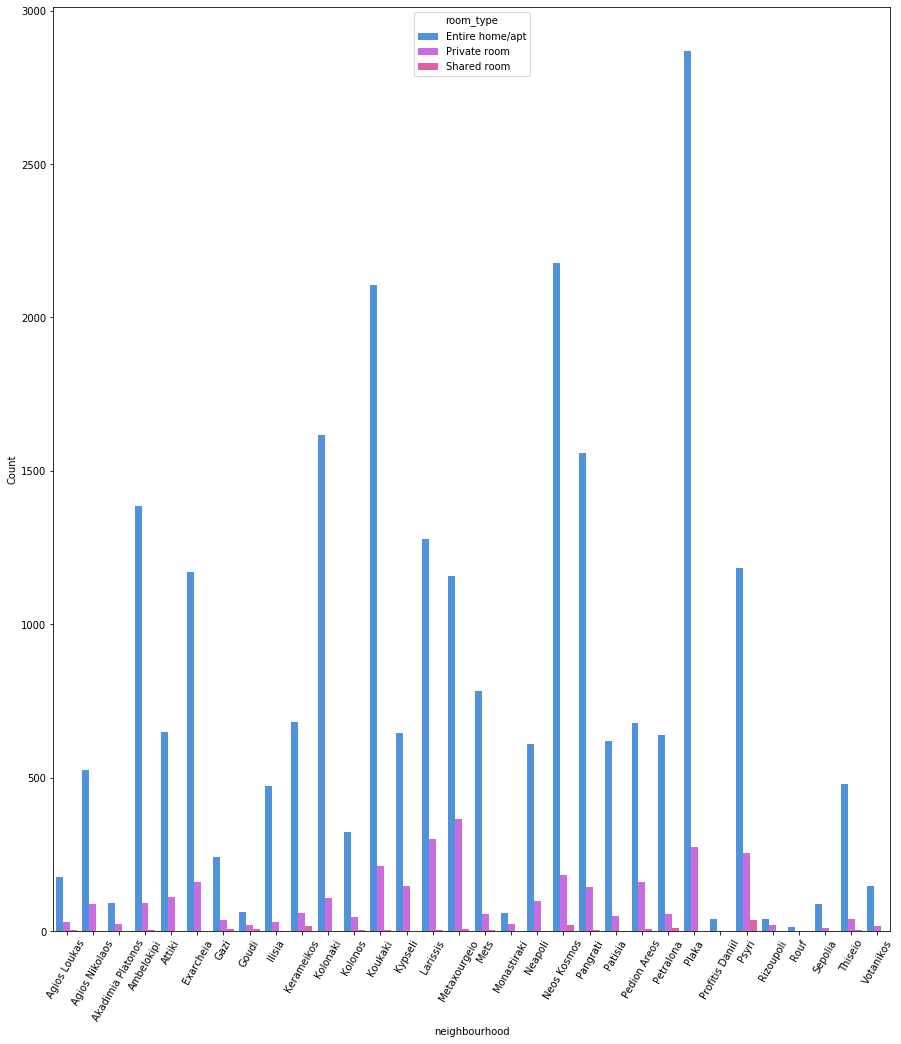

In [11]:
q7 = train.groupby(['neighbourhood','room_type']).count().sort_values('neighbourhood')#.groupby(level=0).head(1)
q7 = q7.rename(columns={q7.columns[0]: 'Count'})
q7 = q7.reset_index(level = ('neighbourhood', 'room_type'))
fig = plt.subplots(figsize=(15, 17))
pal = sb.husl_palette(8, h=.7, l=.6)
chart = sb.barplot(x='neighbourhood', y='Count', hue='room_type', data=q7, palette=pal)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
q7.filter(items=['neighbourhood','room_type','Count'])

### Query 1.8
#### Most expensive room type (using mean prices)

,room_type,price
0,Private room,80.300031


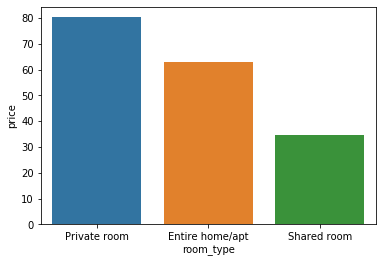

In [12]:
q8 = train.groupby(['room_type']).mean()
q8 = q8.sort_values(['price'], ascending=False)
q8 = q8.filter(items=['price'])
q8 = q8.reset_index()
sb.barplot(x='room_type', y=q8.columns[1], data = q8)
q8.head(1)

### Query 1.9
#### A map of some listings in april

In [13]:
map = folium.Map(location = [37.983810, 23.727539], zoom_start=13)
#map

In [14]:
q9 = train[train.month == '04_April'].filter(items=['name', 'description', 'neighbourhood', 'latitude','longitude', 'room_type', 'price'])
q9 = q9.sample(1000, random_state=30)

for index, row in q9.iterrows():
    pop = row['room_type'] + ' ' + '$' +  str(row['price'])
    folium.Marker([row['latitude'], row['longitude']], popup=pop, tooltip = row['name']).add_to(map)

map

In [15]:
#map.save('april_listings.html')

In [16]:
#HTML(filename='april_listings.html')

### Query 1.10
#### Wordclouds

#### From column 'description'

['Athens Furnished Apartment No6 is 3-bedroom apartment with 2-bathrooms -excellent located  -close to metro station,  -lovely,  -very clean  with all the facilities that you will need, nice balcony, excellent Wi-Fi, cable tv, fully air conditioned… Athens Furnished Apartment No6 is an excellent located, close to metro, lovely, very clean 3-bedroom apartment with 2-bathrooms with all the facilities that you will need and balcony. It is on the 2nd floor but do not worry because there is elevator in the building. Fully equipped kitchen with everything you need to prepare your lunch/dinner. Living room to relax and enjoy a movie or a sport event. 2 Clean nice bathrooms. For more than 6 people there is a sofa/bed.  Apartment No6 has everything you will need. 1st Bedroom – Double bed 2nd Bedroom – 2 single beds 3rd Bedroom – 2 single beds -Telephone line for incoming calls or to call us if you need something. -Free fast Wi-Fi from the best internet provider in Greece. You do not share the c

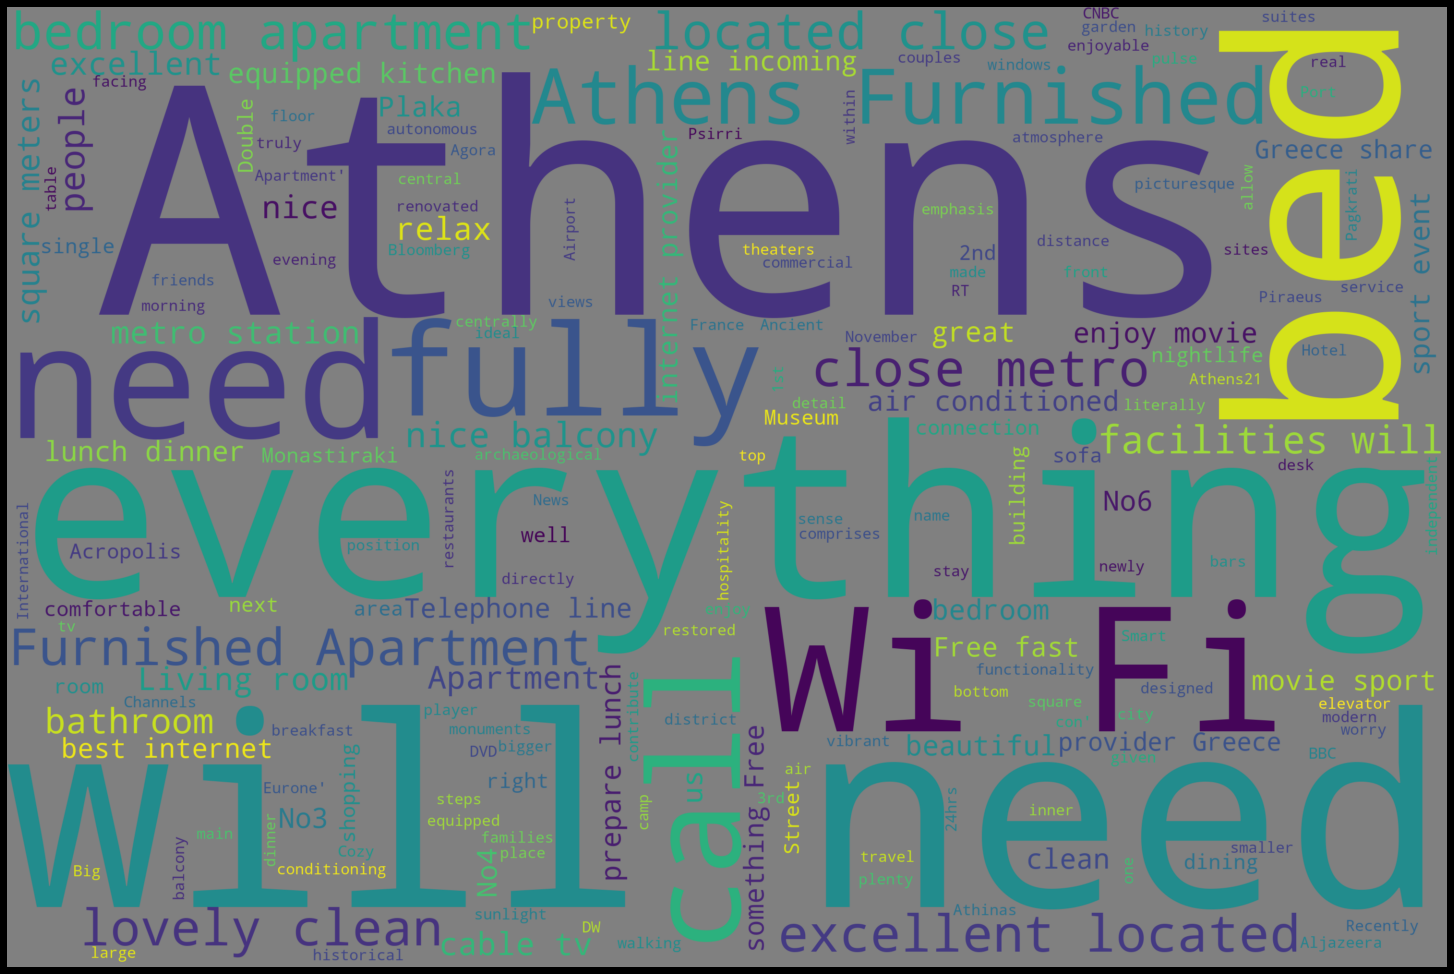

In [23]:
train = train.replace(to_replace = {'description':'Wi Fi'}, value='WiFi', regex=False)
train = train.replace(to_replace = {'description':'Wi-Fi'}, value='WiFi', regex=False)
text = train.description.values
print(text)
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### From 'neighbouthood

['Ambelokipi' 'Ambelokipi' 'Ambelokipi' ... nan nan nan]


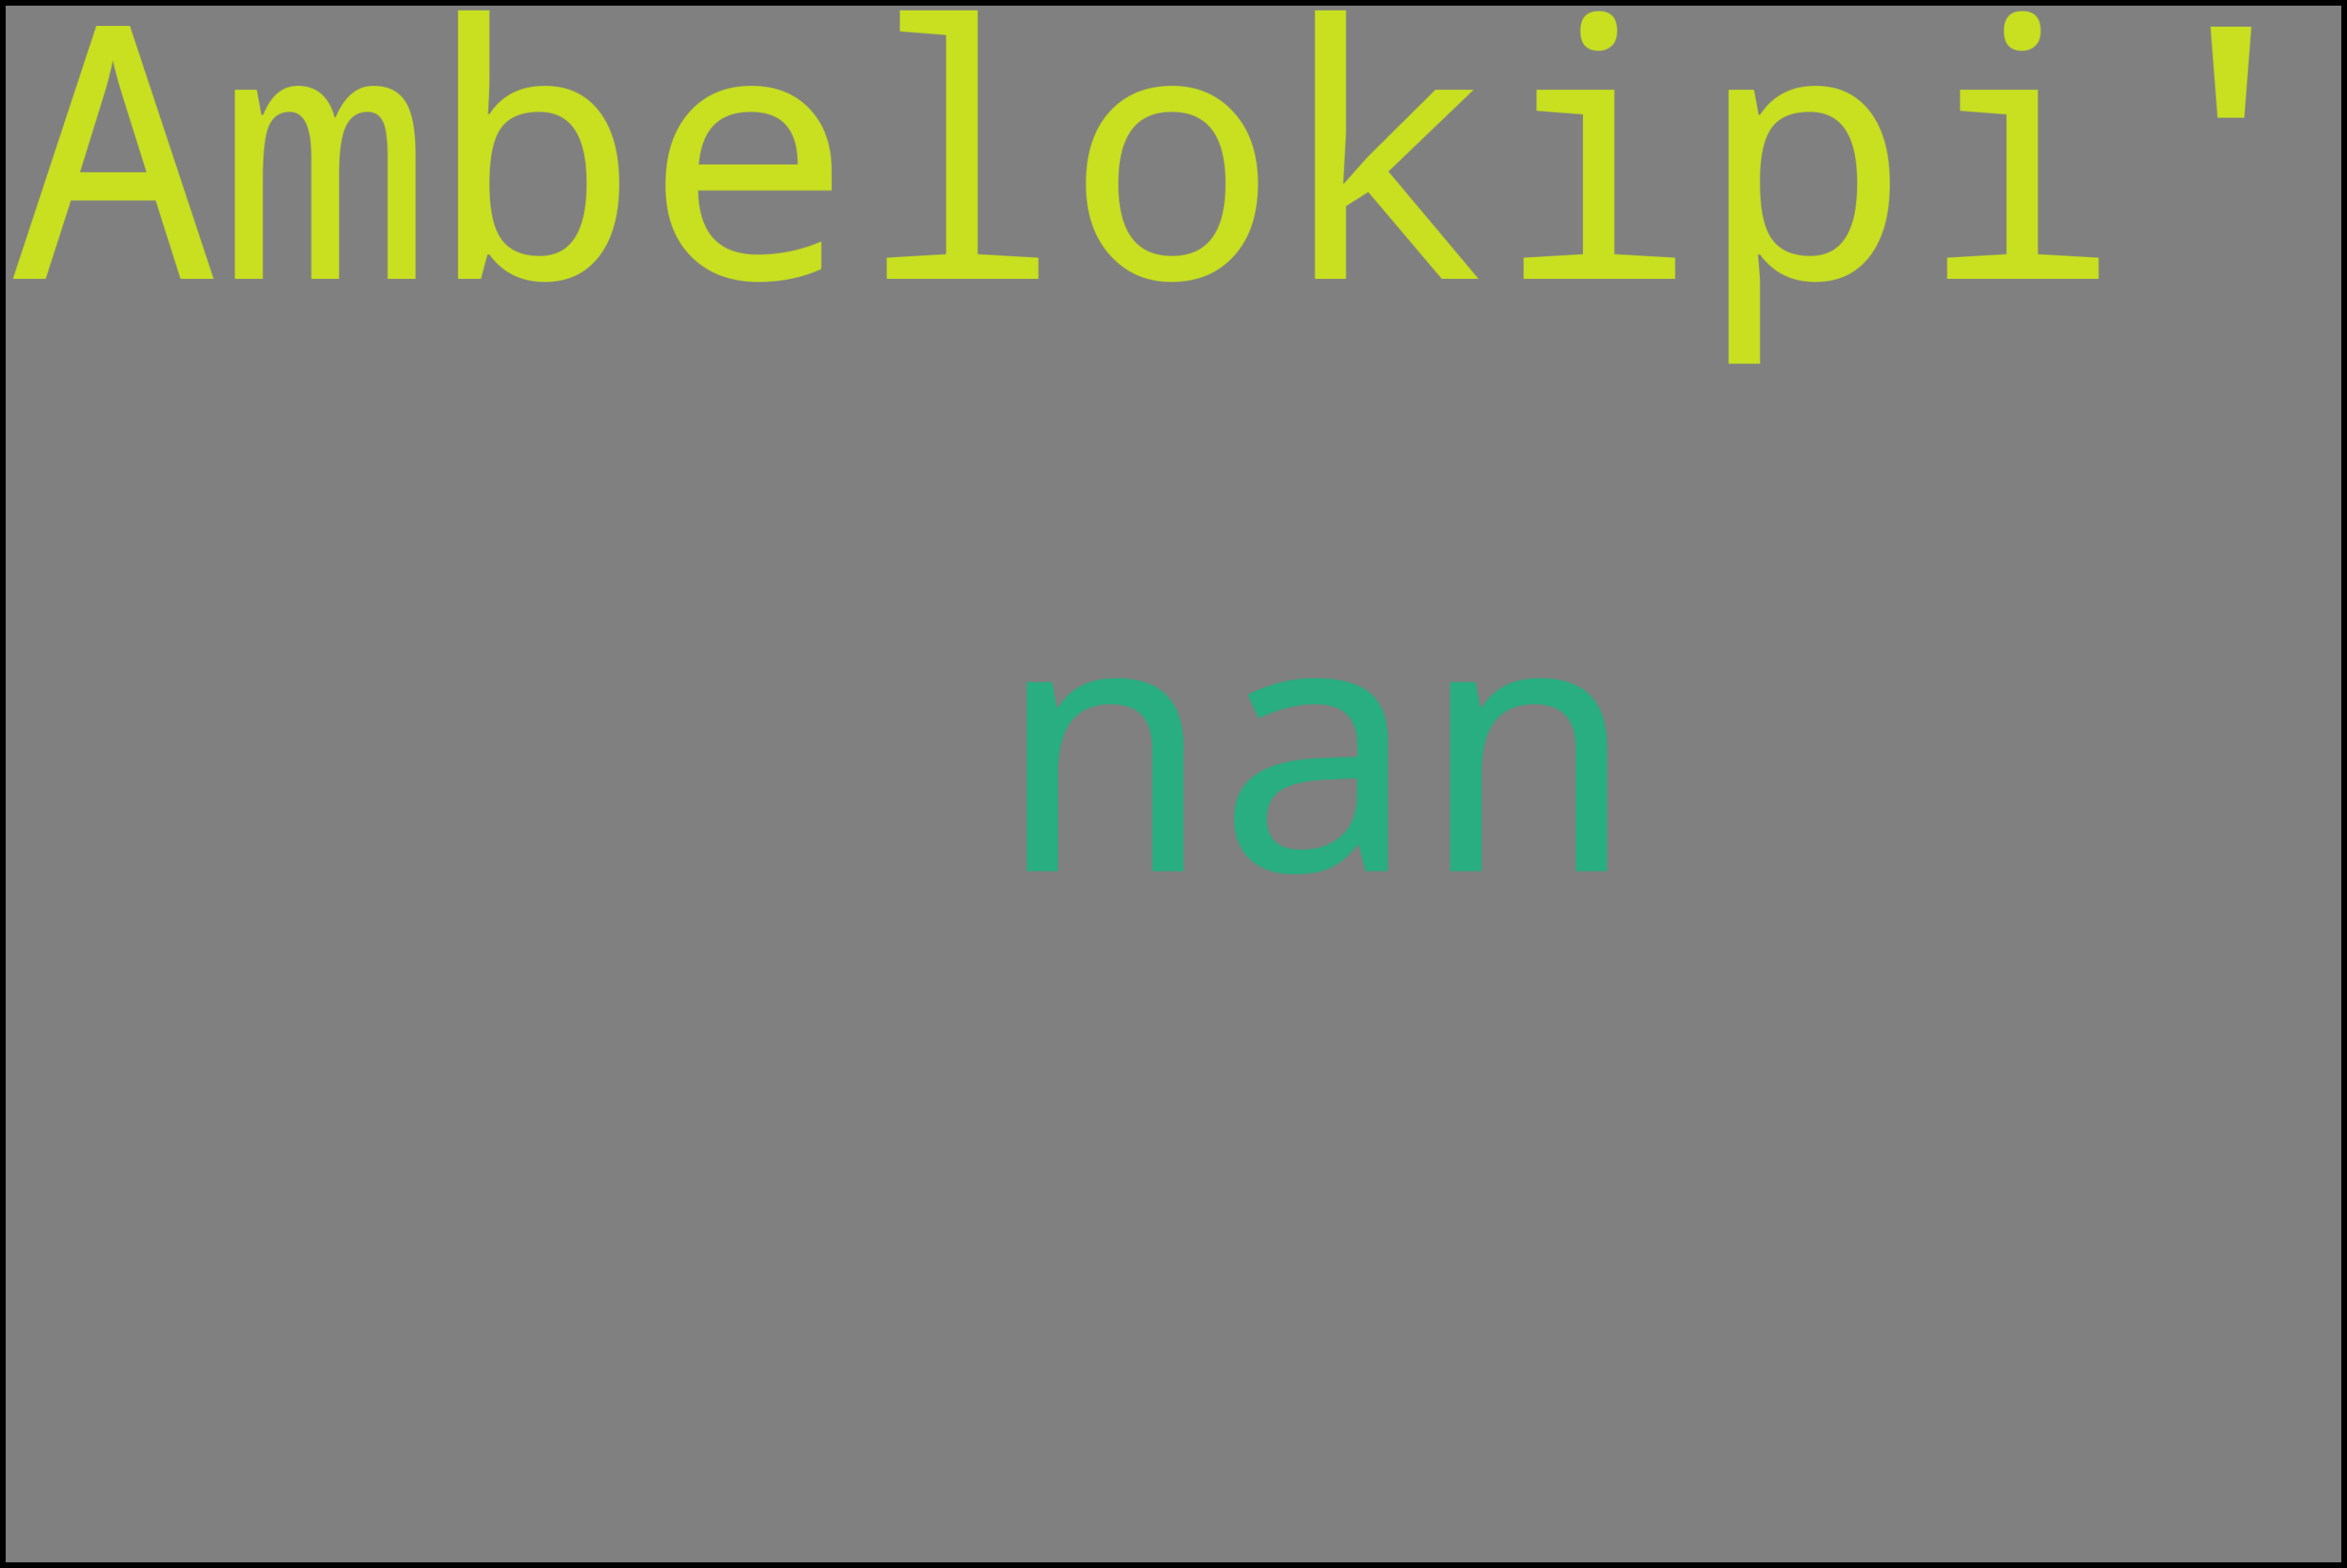

In [32]:
text = train.neighbourhood.values
print(str(text))
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'gray',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()